# ✨`Find the mean, median and mode`

In [59]:
import numpy as np
# np.random.RandomState(42)
np.random.seed(0)
X = np.random.randint(0,100,size=(100))
print('X_mean =',np.mean(X))
print('X_median =',np.median(X))
print('X_mode =',np.argmax(np.bincount(X)))

X_mean= 48.23
X_median= 47.0
X_mode= 88


# ✨`Fine the range and midrange`

In [60]:
print('X_range = ',max(X) - min(X))
print('X_midrange = ',(max(X)-min(X))/2)

X_range =  99
X_midrange =  49.5


# ✨`Pictogram Chart`

# ✨`Bar Plot`

In [66]:
%matplotlib inline
import seaborn as sns ; sns.set()
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
tips.pivot_table(index='day',columns='sex',values='total_bill')

sex,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


d:\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


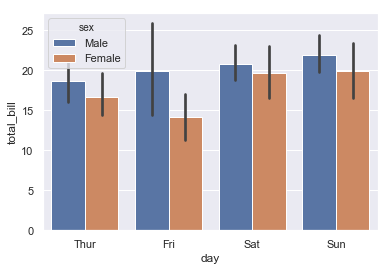

In [64]:
sns.barplot(x="day",y="total_bill",hue="sex",data=tips)

[`Using Error Bars in your Graph`](https://projects.ncsu.edu/labwrite/res/gt/gt-stat-home.html#opennewwindow)

In [108]:
Fri_Male = tips.loc[(tips.day == 'Fri')&(tips.sex == 'Male'),'total_bill']
print(np.mean(Fri_Male)  +2*np.std(Fri_Male) / (len(Fri_Male))**0.5)
print(np.mean(Fri_Male)  -2*np.std(Fri_Male) / (len(Fri_Male))**0.5)

25.86650849903717
13.847491500962828


# ✨`Line Plot`

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
temp = pd.DataFrame({'-195':[1,1,2,1,2],'0':[52,58,82,35,84],'20':[48,66,74,86,78],'100':[73.5,82,72,80,79]})
temp

,-195,0,20,100
0,1,52,48,73.5
1,1,58,66,82.0
2,2,82,74,72.0
3,1,35,86,80.0
4,2,84,78,79.0


In [4]:
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html
temp = temp.T.stack().reset_index()[["level_0", 0]]
temp.columns = ['temp','energy']
temp['temp'] = pd.to_numeric(temp['temp'])

In [5]:
temp.head()

,temp,energy
0,-195,1.0
1,-195,1.0
2,-195,2.0
3,-195,1.0
4,-195,2.0


d:\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


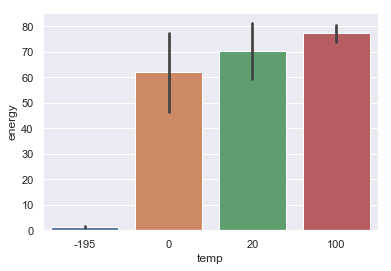

In [9]:
sns.barplot(x="temp",y="energy",data=temp)

# ✨`Pie Plot`

# ✨`Misunderstanding Line Plot`

# ✨`Stem-and-Leaf Plot`
https://en.wikipedia.org/wiki/Stem-and-leaf_display

# ✨`Boxplots`

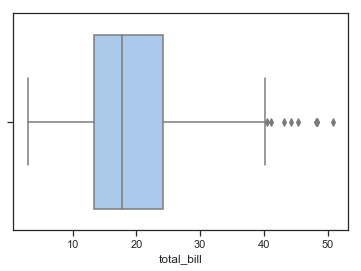

In [4]:
import seaborn as sns
sns.set(style="ticks",palette="pastel")
sns.boxplot(x=tips["total_bill"])

# ✨`Boxplots 2`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

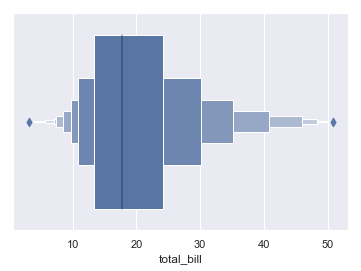

In [3]:
tips = sns.load_dataset("tips")
sns.boxenplot(x=tips["total_bill"])

# ✨`Central Tendency`

Statistics
- Descriptive Statistics
- Inferential Statistics

`Central Tendency`
- mean
    - arithmetic mean
    - geometric mean (stock return)
    - harmonic mean
- median
- mode

# ✨`Population & Sample`

$μ = Population mean$
 
$\bar{X}  = Sample mean$